In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


crypto_path = "resources/crypto_tradinds.csv"
gold_path = "resources/gold_monthly_csv.csv"

crypto_data = pd.read_csv(crypto_path,low_memory=False)
gold_data = pd.read_csv(gold_path)

crypto_data.head(10)

,trade_date,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
0,2016-01-01,36278900.0,434.33,1.0,6.529300e+09,0.000000,0.000000,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,Proof of Work (PoW)
1,2016-01-02,30096600.0,433.44,1.0,6.517390e+09,-0.001824,-0.002049,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,Proof of Work (PoW)
2,2016-01-03,39633800.0,430.01,1.0,6.467430e+09,-0.007666,-0.007913,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,Proof of Work (PoW)
3,2016-01-04,38477500.0,433.09,1.0,6.515713e+09,0.007466,0.007163,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,Proof of Work (PoW)
4,2016-01-05,34522600.0,431.96,1.0,6.500393e+09,-0.002351,-0.002609,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,Proof of Work (PoW)
5,2016-01-06,34042500.0,429.11,1.0,6.458942e+09,-0.006377,-0.006598,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,Proof of Work (PoW)
6,2016-01-07,87562200.0,458.05,1.0,6.896279e+09,0.067710,0.067442,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,Proof of Work (PoW)
7,2016-01-08,56993000.0,453.23,1.0,6.825700e+09,-0.010234,-0.010523,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,Proof of Work (PoW)
8,2016-01-09,32278000.0,447.61,1.0,6.742767e+09,-0.012150,-0.012400,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,Proof of Work (PoW)
9,2016-01-10,35995900.0,447.99,1.0,6.750440e+09,0.001138,0.000849,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,Proof of Work (PoW)


In [89]:
#cleaning the data

#remove irrelavant columns

crypto_data_1 = crypto_data[["trade_date", "volume", "price_usd", "market_cap", "capitalization_change_1_day", "USD_price_change_1_day", "crypto_name", "crypto_type", "ticker", "minable" ]]
crypto_data_1.head(10)

,trade_date,volume,price_usd,market_cap,capitalization_change_1_day,USD_price_change_1_day,crypto_name,crypto_type,ticker,minable
0,2016-01-01,36278900.0,434.33,6.529300e+09,0.000000,0.000000,Bitcoin,0.0,BTC,1.0
1,2016-01-02,30096600.0,433.44,6.517390e+09,-0.001824,-0.002049,Bitcoin,0.0,BTC,1.0
2,2016-01-03,39633800.0,430.01,6.467430e+09,-0.007666,-0.007913,Bitcoin,0.0,BTC,1.0
3,2016-01-04,38477500.0,433.09,6.515713e+09,0.007466,0.007163,Bitcoin,0.0,BTC,1.0
4,2016-01-05,34522600.0,431.96,6.500393e+09,-0.002351,-0.002609,Bitcoin,0.0,BTC,1.0
5,2016-01-06,34042500.0,429.11,6.458942e+09,-0.006377,-0.006598,Bitcoin,0.0,BTC,1.0
6,2016-01-07,87562200.0,458.05,6.896279e+09,0.067710,0.067442,Bitcoin,0.0,BTC,1.0
7,2016-01-08,56993000.0,453.23,6.825700e+09,-0.010234,-0.010523,Bitcoin,0.0,BTC,1.0
8,2016-01-09,32278000.0,447.61,6.742767e+09,-0.012150,-0.012400,Bitcoin,0.0,BTC,1.0
9,2016-01-10,35995900.0,447.99,6.750440e+09,0.001138,0.000849,Bitcoin,0.0,BTC,1.0


In [90]:
#check for any null values
crypto_data_1.count()

trade_date                     2382643
volume                         2382643
price_usd                      2382643
market_cap                     2382643
capitalization_change_1_day    2382643
USD_price_change_1_day         2382643
crypto_name                    2223794
crypto_type                    2223794
ticker                         2223794
minable                        2223794
dtype: int64

In [91]:
#drop null values

no_null_crypto_data_1 = crypto_data_1.dropna(how='any')

no_null_crypto_data_1.count()

trade_date                     2223794
volume                         2223794
price_usd                      2223794
market_cap                     2223794
capitalization_change_1_day    2223794
USD_price_change_1_day         2223794
crypto_name                    2223794
crypto_type                    2223794
ticker                         2223794
minable                        2223794
dtype: int64

In [92]:
#split the date by year, month, day for each column

no_null_crypto_data_1[['trade_year', 'trade_month', 'trade_day']] = no_null_crypto_data_1['trade_date'].str.split('-', expand=True)
no_null_crypto_data_1.head(10)

/Users/jadeqin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,trade_date,volume,price_usd,market_cap,capitalization_change_1_day,USD_price_change_1_day,crypto_name,crypto_type,ticker,minable,trade_year,trade_month,trade_day
0,2016-01-01,36278900.0,434.33,6.529300e+09,0.000000,0.000000,Bitcoin,0.0,BTC,1.0,2016,01,01
1,2016-01-02,30096600.0,433.44,6.517390e+09,-0.001824,-0.002049,Bitcoin,0.0,BTC,1.0,2016,01,02
2,2016-01-03,39633800.0,430.01,6.467430e+09,-0.007666,-0.007913,Bitcoin,0.0,BTC,1.0,2016,01,03
3,2016-01-04,38477500.0,433.09,6.515713e+09,0.007466,0.007163,Bitcoin,0.0,BTC,1.0,2016,01,04
4,2016-01-05,34522600.0,431.96,6.500393e+09,-0.002351,-0.002609,Bitcoin,0.0,BTC,1.0,2016,01,05
5,2016-01-06,34042500.0,429.11,6.458942e+09,-0.006377,-0.006598,Bitcoin,0.0,BTC,1.0,2016,01,06
6,2016-01-07,87562200.0,458.05,6.896279e+09,0.067710,0.067442,Bitcoin,0.0,BTC,1.0,2016,01,07
7,2016-01-08,56993000.0,453.23,6.825700e+09,-0.010234,-0.010523,Bitcoin,0.0,BTC,1.0,2016,01,08
8,2016-01-09,32278000.0,447.61,6.742767e+09,-0.012150,-0.012400,Bitcoin,0.0,BTC,1.0,2016,01,09
9,2016-01-10,35995900.0,447.99,6.750440e+09,0.001138,0.000849,Bitcoin,0.0,BTC,1.0,2016,01,10


In [45]:
# Create new DataFrames that looks into a specific crypto
Bitcoin_data = no_null_crypto_data_1.loc[no_null_crypto_data_1["crypto_name"] == "Bitcoin"]
Ethereum_data = no_null_crypto_data_1.loc[no_null_crypto_data_1["crypto_name"] == "Ethereum"]
Dogecoin_data = no_null_crypto_data_1.loc[no_null_crypto_data_1["crypto_name"] == "Dogecoin"]
Stellar_data = no_null_crypto_data_1.loc[no_null_crypto_data_1["crypto_name"] == "Stellar"]

In [ ]:
##Bitcoin

In [46]:
#yearly performance of Bitcoin 

Bitcoin_data = Bitcoin_data.groupby("trade_year")

average_price = Bitcoin_data["price_usd"].mean()

average_marketcap = Bitcoin_data["market_cap"].mean()

total_volume = Bitcoin_data["volume"].sum()


yearly_performace_Bitcoin = pd.DataFrame({"Average Market Cap": average_marketcap,
"Average Price": average_price, "Total Volume" : total_volume})

yearly_performace_Bitcoin


,Average Market Cap,Average Price,Total Volume
trade_year,,,
2016,8.929758e+09,568.492213,3.144837e+10
2017,6.645752e+10,4006.033616,8.697464e+11
2018,1.292673e+11,7572.298877,2.213197e+12
2019,1.306618e+11,7324.709093,5.884878e+12
2020,1.741145e+11,9472.949057,9.179893e+12


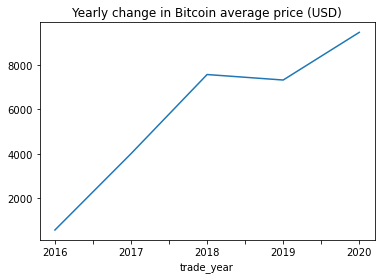

In [52]:
#plot some graphs (line graph)

year_v_ap = average_price.plot(kind="line", title="Yearly change in Bitcoin average price (USD)")

plt.show()


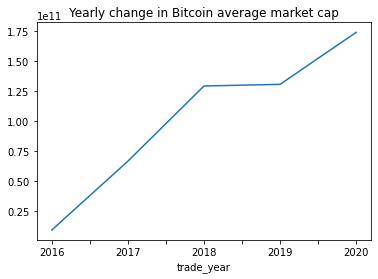

In [53]:
#market cap (is the total value of the cryptocurrency), calculated by multiplying price of the cryptocurrency with the number of coins in circulation.

year_v_am = average_marketcap.plot(kind="line", title="Yearly change in Bitcoin average market cap") 

plt.show()

#the 1e11 is the standard scientific notion, and here it indicates an overall scale factor for the y-axis, the acutal value for the y axis shoud be 
#whatever the number on the y-axis, 1.00 *1e11 = 1 * 10^11 = 100,000,000,000

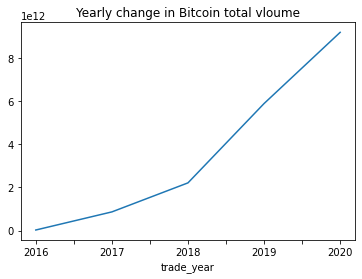

In [54]:
#total volume

year_v_tv = total_volume.plot(kind="line", title="Yearly change in Bitcoin total vloume")

plt.show()

In [55]:
##Ethrium

In [56]:
Ethereum_data = no_null_crypto_data_1.loc[no_null_crypto_data_1["crypto_name"] == "Ethereum"]

Ethereum_data = Ethereum_data.groupby("trade_year")


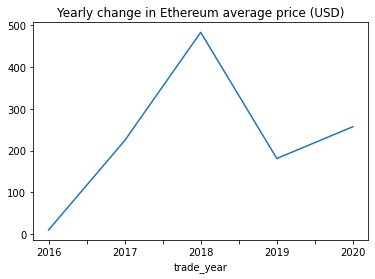

In [57]:
average_price = Ethereum_data["price_usd"].mean()

year_v_ap = average_price.plot(kind="line", title="Yearly change in Ethereum average price (USD)")

plt.show()

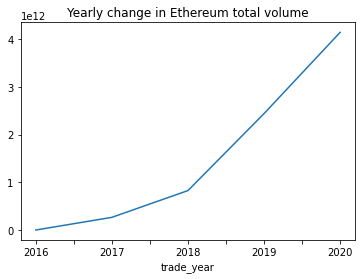

In [59]:
total_volume = Ethereum_data["volume"].sum()

year_v_ap = total_volume.plot(kind="line", title="Yearly change in Ethereum total volume")

plt.show()

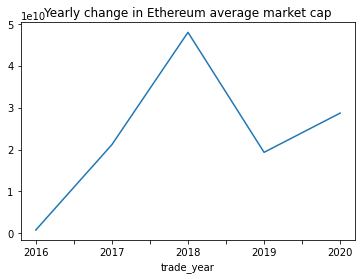

In [60]:
average_marketcap = Ethereum_data["market_cap"].mean()

year_v_ap = average_marketcap.plot(kind="line", title="Yearly change in Ethereum average market cap")

plt.show()

In [ ]:
##Dogecoin

In [62]:
Dogecoin_data = no_null_crypto_data_1.loc[no_null_crypto_data_1["crypto_name"] == "Dogecoin"]

Dogecoin_data = Dogecoin_data.groupby("trade_year")

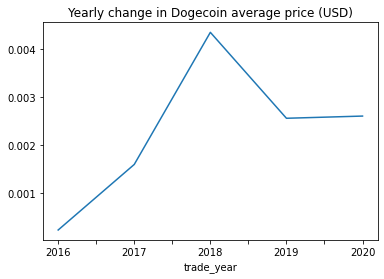

In [63]:

average_price = Dogecoin_data["price_usd"].mean()

year_v_ap = average_price.plot(kind="line", title="Yearly change in Dogecoin average price (USD)")

plt.show()

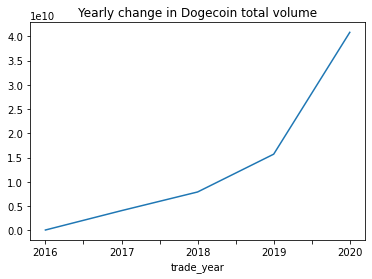

In [70]:
total_volume = Dogecoin_data["volume"].sum()

year_v_ap = total_volume.plot(kind="line", title="Yearly change in Dogecoin total volume")

plt.show()

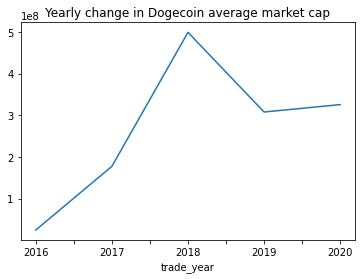

In [66]:
average_marketcap = Dogecoin_data["market_cap"].mean()

year_v_ap = average_marketcap.plot(kind="line", title="Yearly change in Dogecoin average market cap")

plt.show()

In [ ]:
#stellar

In [71]:
Stellar_data = no_null_crypto_data_1.loc[no_null_crypto_data_1["crypto_name"] == "Stellar"]
Stellar_data = Stellar_data.groupby("trade_year")

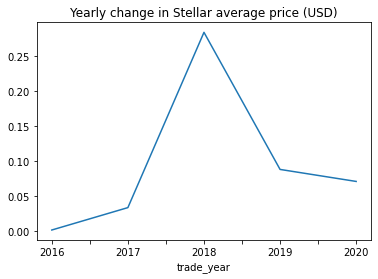

In [72]:
average_price = Stellar_data["price_usd"].mean()

year_v_ap = average_price.plot(kind="line", title="Yearly change in Stellar average price (USD)")

plt.show()

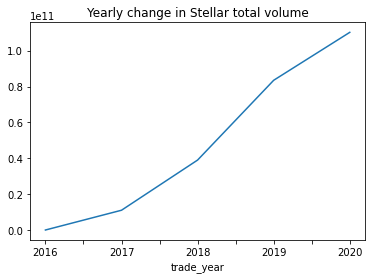

In [73]:
total_volume = Stellar_data["volume"].sum()

year_v_ap = total_volume.plot(kind="line", title="Yearly change in Stellar total volume")

plt.show()

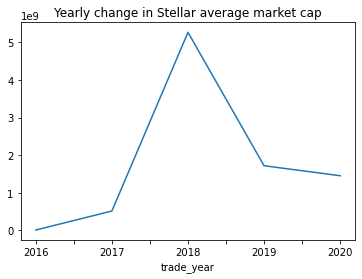

In [74]:
average_marketcap = Stellar_data["market_cap"].mean()

year_v_ap = average_marketcap.plot(kind="line", title="Yearly change in Stellar average market cap")

plt.show()